In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import  re

In [9]:
def parse_out(filename: str) -> dict:
  with open(filename) as f:
    siminfo = f.readline().strip()
    nx = int(re.findall('(?:nx=)([0-9]*)', siminfo)[0])
    ny = int(re.findall('(?:ny=)([0-9]*)', siminfo)[0])
    f.readline()  # rho
    rho = np.reshape([ float(s) for s in f.readline().strip().split(' ') ], (nx,ny), order='C')[1:-1,1:-1]
    f.readline()  # vx
    vx = np.reshape([ float(s) for s in f.readline().strip().split(' ') ], (nx,ny), order='C')[1:-1,1:-1]
    f.readline()  # vy
    vy = np.reshape([ float(s) for s in f.readline().strip().split(' ') ], (nx,ny), order='C')[1:-1,1:-1]
  return {
    'rho': rho,
    'vx': vx,
    'vy': vy
  }

In [10]:
data1 = parse_out('sim-serial-100x100.out')
data2 = parse_out('sim-serial-noleap-100x100.out')

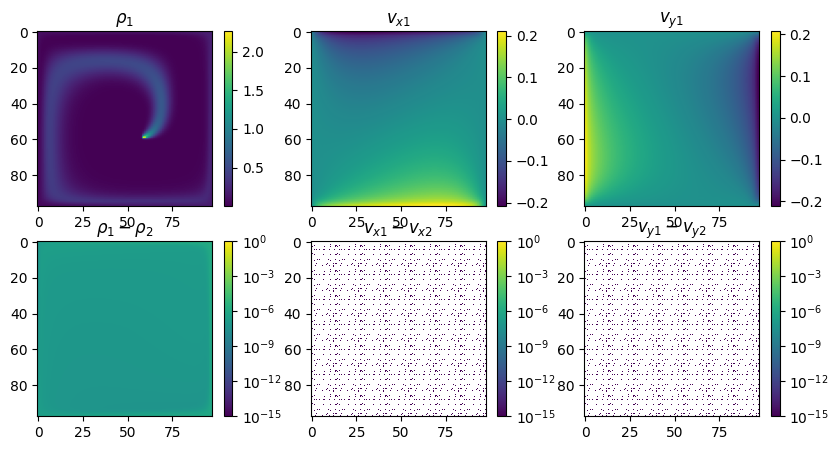

In [13]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=3, nrows=2)
plt.colorbar(ax[0,0].imshow(data1['rho']))
ax[0,0].set_title('$\\rho_1$')
plt.colorbar(ax[1,0].imshow(np.abs(data1['rho']-data2['rho']), norm='log', vmin=1e-15, vmax=1))
ax[1,0].set_title('$\\rho_1 - \\rho_2$')
plt.colorbar(ax[0,1].imshow(data1['vx']))
ax[0,1].set_title('$v_{x1}$')
plt.colorbar(ax[1,1].imshow(np.abs(data1['vx']-data2['vx']), norm='log', vmin=1e-15, vmax=1))
ax[1,1].set_title('$v_{x1} - v_{x2}$')
plt.colorbar(ax[0,2].imshow(data1['vy']))
ax[0,2].set_title('$v_{y1}$')
plt.colorbar(ax[1,2].imshow(np.abs(data1['vy']-data2['vy']), norm='log', vmin=1e-15, vmax=1))
ax[1,2].set_title('$v_{y1} - v_{y2}$')
plt.show()